# **Завдання №3: Порівняльний аналіз алгоритмів на графах**

## **Мета роботи**
Реалізувати алгоритми над графами, порівнювати їх роботу в залежності від способу представлення графу.

## **Основне завдання**
Вам необхідно реалізувати та порівняти ефективність деяких алгоритмів роботи на графах. Усі алгоритми  описано в курсі "Дискретна математика", відео лежать самі знаємо де. Завдання виконується згідно варіанту.

## Варіант №1
Порівняти алгоритми обходу вершин BFS та DFS (у рекурсивному варіанті).

Також ми можемо сформулювати власну дослідницьку задачу на графах, яка вам більш цікава, і, після узгодження її з викладачем, виконувати її замість свого варіанту.

При порівнянні алгоритмів урахуйте такі нюанси.
*   Порівняння повинно виконуватисб на графах різного розміру (кількість вершин ${n\geq5}$) та різної шільності (варіюйте ймовірність появи ребра $p$).
*   Урахуйте, що деякі алгоритми "заточені" під конкретні способи представлення графів (наприклад, алгоритми Уоршелла та Флойда-Уоршелла працюють тільки з матричним представленням, а алгоритми Дейкстри та Беллмана-Форда, хоча й можуть працювати у матричному представленні, значно більш ефективні над списками суміжності). Зробіть дизайн вашого експерементального дослідження із поправкою на ці особливості.
*   Основним параметром порівняння є час виконання роботи. Для правильного вимірювання часу роботи необхідно виключити з оцінки усі можливі передобчислення та накладні витрати, які не пов'язані безпосередньо із роботою алгоритму (наприклад, перехід від одного представлення графу в інше).
*   Для фільтрування так званого "алгоритмічного шуму" - витрати часу, пов'язаних із функціонуванням обчислювальної системи, - необхідно для кожного фіксованого набору значень параметрів виконати алгоритм значну кількість разів (наприклад, 100) та взяти усереднений час роботи. При цьому важливо, щоб на вхід алгоритму потрапляли випадкові вхідні дані, оскільки кеш L3 процесору запамятовує попередні обчислення. Час генерування випадкових даних не повинно включастись в оцінку часу роботи алгоритмів; генерування необхідно роботи заздалегіть.

Результати вашої роботи теж подаються у вигляді вже не дуже коротенького звіту, який повинен включати:
*   постановку завдання, вибір та обґрунтування форми представлення графів, параметрів роботи алгоритмів;
*   результати ваших обчислень у вигляді таблиць (точні значення) та у вигляді діаграм / гістограм / графіків тощо;
*   інтерпретацію ваших даних: про що говорять одержані вами дані, які спостереження та твердження можна сформулювати на їх основі.

Подумайте, яка форма візуалізації результатів буде найбільш інформативною для вашого дослідження.

In [1]:
from MatrixGraph import NonOrientedMatrixGraph as nmg
import matplotlib.pyplot as plt
import numpy as np
import time

In [2]:
g = nmg(8)
g.add_edge(0, 1)
g.add_edge(0, 2)
g.add_edge(0, 3)
g.add_edge(1, 2)
g.add_edge(1, 4)
g.add_edge(2, 4)
g.add_edge(2, 5)
g.add_edge(3, 5)
g.add_edge(4, 6)
g.add_edge(4, 7)
g.add_edge(5, 6)
g.add_edge(5, 7)
g.add_edge(6, 7)

print(g)

[[inf, 1, 1, 1, inf, inf, inf, inf]
 [1, inf, 1, inf, 1, inf, inf, inf]
 [1, 1, inf, inf, 1, 1, inf, inf]
 [1, inf, inf, inf, inf, 1, inf, inf]
 [inf, 1, 1, inf, inf, inf, 1, 1]
 [inf, inf, 1, 1, inf, inf, 1, 1]
 [inf, inf, inf, inf, 1, 1, inf, 1]
 [inf, inf, inf, inf, 1, 1, 1, inf]]



In [3]:
print(g.matrix2list())

0 : [(1, 1), (2, 1), (3, 1)] 
1 : [(0, 1), (2, 1), (4, 1)] 
2 : [(0, 1), (1, 1), (4, 1), (5, 1)] 
3 : [(0, 1), (5, 1)] 
4 : [(1, 1), (2, 1), (6, 1), (7, 1)] 
5 : [(2, 1), (3, 1), (6, 1), (7, 1)] 
6 : [(4, 1), (5, 1), (7, 1)] 
7 : [(4, 1), (5, 1), (6, 1)] 



In [4]:
def dfs_u(graphL: list, v, visited):
    visited.append(v)
    for u, w in graphL[v]:
            if u not in visited:
                dfs_u(graphL, u, visited)


def DFS(s, graph_list: nmg):
    visited = []
    dfs_u(graph_list, s, visited)
    return visited

In [5]:
print(DFS(0, g.matrix2list().L))

[0, 1, 2, 4, 6, 5, 3, 7]


In [6]:
def BFS(s, graph_list: nmg) -> nmg:
    T = [s]
    visited = [s]
    while T != []:
        i = T.pop(0)
        for u, w in graph_list[i]:
            if u not in visited:
                T.append(u)
                visited.append(u)
    return visited

In [7]:
print(BFS(0, g.matrix2list().L))

[0, 1, 2, 3, 4, 5, 6, 7]


Генерувати графи для дослідження

In [8]:
def generate_graphs(size: int, amount: int, p: float) -> list:
    list_g = []
    for _ in range(amount):
        new_graph = nmg(size)
        new_graph.model_Erdasha_Renya(p)
        list_g.append(new_graph.matrix2list().L)
    return list_g

In [9]:
X = list(range(10, 101, 5))

In [10]:
Y_dfs = []
for x in X:
    am = 1000
    gg = generate_graphs(x, am, 0.8)
    start_time = time.time()
    for g in gg:
        DFS(0, g)
    Y_dfs.append((time.time()-start_time)/am)

Text(0.5, 1.0, 'DFS')

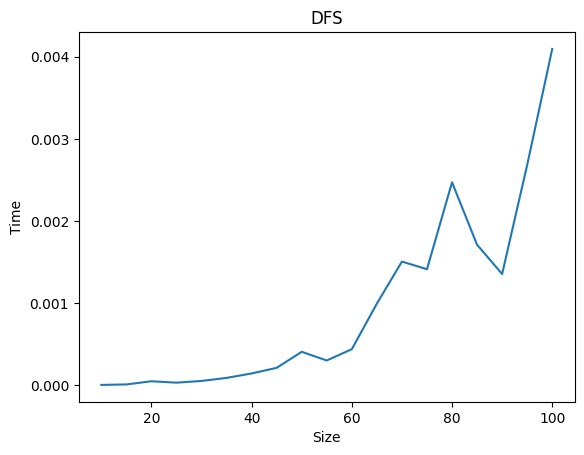

In [11]:
plt.plot(X, Y_dfs)
plt.xlabel("Size")
plt.ylabel("Time")
plt.title("DFS")

In [12]:
Y_bfs = []
for x in X:
    am = 1000
    gg = generate_graphs(x, am, 0.8)
    start_time = time.time()
    for g in gg:
        BFS(0, g)
    Y_bfs.append((time.time()-start_time)/am)

Text(0.5, 1.0, 'BFS')

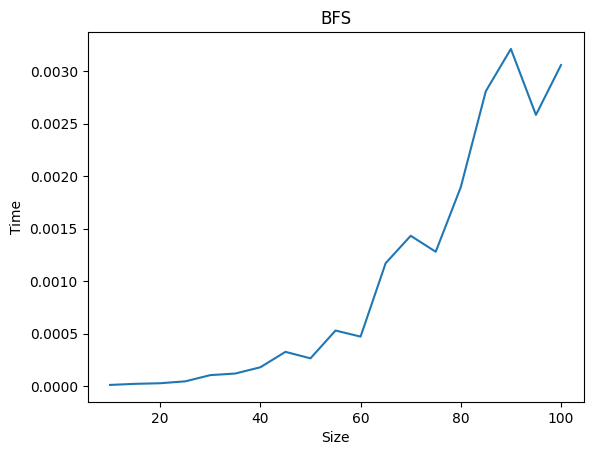

In [13]:
plt.plot(X, Y_bfs)
plt.xlabel("Size")
plt.ylabel("Time")
plt.title("BFS")

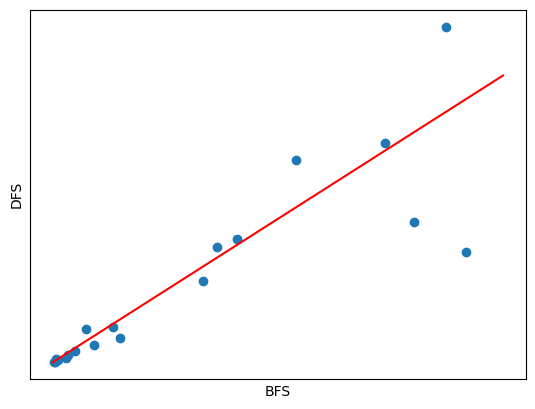

In [19]:
plt.scatter(Y_bfs, Y_dfs)
plt.xticks([])
plt.yticks([])
plt.xlabel("BFS")
plt.ylabel("DFS")
plt.plot([0, 0.0035], [0, 0.0035], color="red")

З графіку бачимо, що $DFS = \theta(BFS)$

Розглянемо зі змінною $p$

In [15]:
X

[10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]

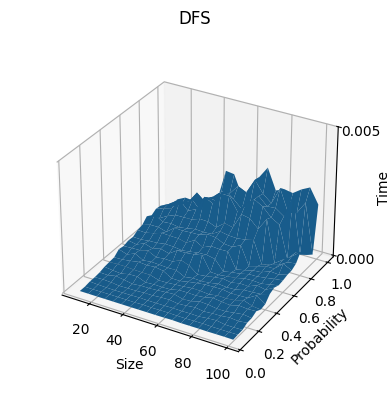

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
Y = np.arange(0.05, 1.01, 0.05)
X_, Y_ = np.meshgrid(X, Y)
z_ = []
am = 1000
for i in range(len(X)):
    for j in range(len(Y)):
        gg = generate_graphs(X[i], am, Y[j])
        start_time = time.time()
        for g in gg:
            DFS(0, g)
            
        z_.append((time.time()-start_time)/am)
zs = np.array(z_)

Z = zs.reshape(X_.shape)

ax.title.set_text("DFS")
ax.plot_surface(X_, Y_, Z)
ax.set_xlabel('Size')
ax.set_ylabel('Probability')
ax.set_zlabel('Time', rotation=90)
ax.set_zticks([0, 0.005])
ax.set_box_aspect(None, zoom=0.85)

plt.show()

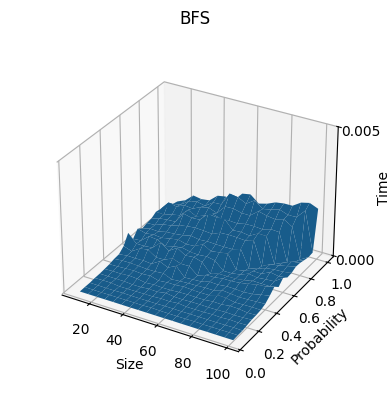

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
Y = np.arange(0.05, 1.01, 0.05)
X_, Y_ = np.meshgrid(X, Y)
z = []
am = 1000
for i in range(len(X)):
    for j in range(len(Y)):
        # print(X[i])
        gg = generate_graphs(X[i], am, Y[j])
        start_time = time.time()
        for g in gg:
            BFS(0, g)
            
        z.append((time.time()-start_time)/am)
zs = np.array(z)

Z = zs.reshape(X_.shape)

ax.plot_surface(X_, Y_, Z)
ax.title.set_text("BFS")
ax.set_xlabel('Size')
ax.set_ylabel('Probability')
ax.set_zlabel('Time', rotation=90)
ax.set_zticks([0, 0.005])
ax.set_box_aspect(None, zoom=0.85)

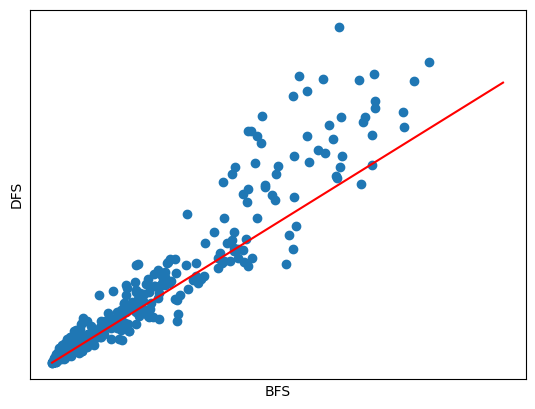

In [25]:
plt.scatter(z, z_)
plt.xlabel("BFS")
plt.ylabel("DFS")
plt.xticks([])
plt.yticks([])
plt.plot([0, 0.0025], [0, 0.0025], color="red")

Text(0, 0.5, 'Probability')

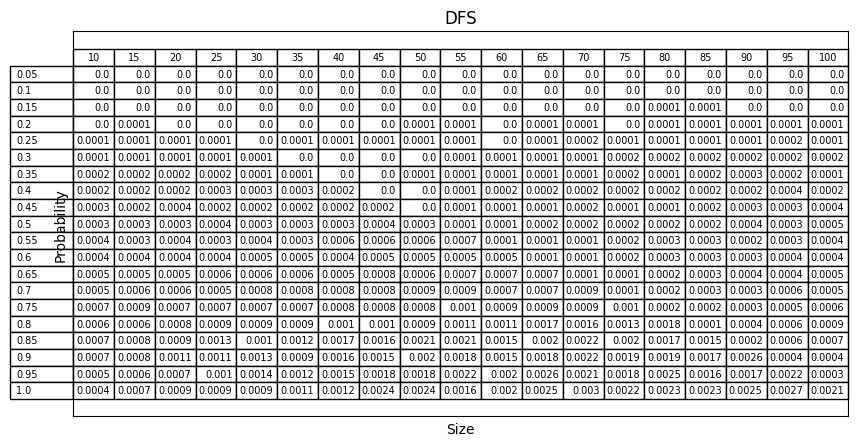

In [66]:
fig, ax = plt.subplots(1, 1, figsize = (10, 5))

a = []
for ua in Z.reshape(Z.size):
    a.append(round(ua, 4))
y__ = []
for uy in Y.reshape(Y.size):
    y__.append(round(uy, 2))
y__[-1] = "1.0            "
ax.table(cellText=np.array(a).reshape(Z.shape),
                      rowLabels=np.array(y__).reshape(Y.shape),
                      colLabels=X,
                      loc='center') 
ax.set_title("DFS")
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel("Size")
ax.set_ylabel("Probability")


Text(0, 0.5, 'Probability')

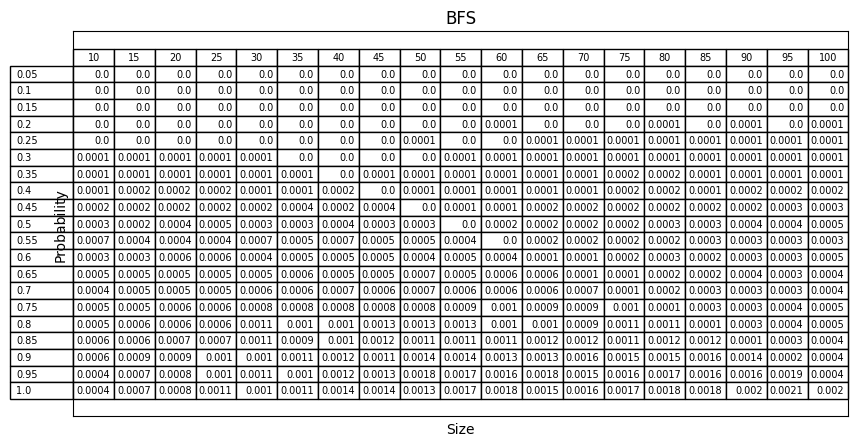

In [67]:
fig, ax = plt.subplots(1, 1, figsize = (10, 5))
a = []
for ua in z:
    a.append(round(ua, 4))
y__ = []
for uy in Y.reshape(Y.size):
    y__.append(round(uy, 2))
y__[-1] = "1.0            "
ax.table(cellText=np.array(a).reshape(Z.shape),
                      rowLabels=np.array(y__).reshape(Y.shape),
                      colLabels=X,
                      loc='center') 
ax.set_title("BFS")
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel("Size")
ax.set_ylabel("Probability")

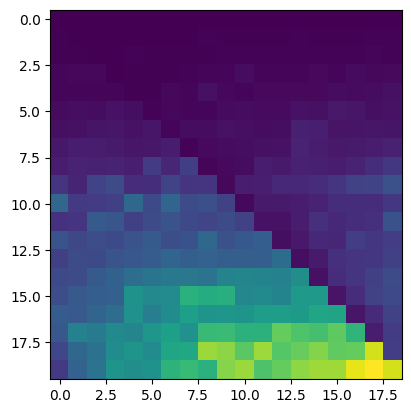

In [31]:
plt.imshow(np.array(z).reshape(X_.shape))